In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import xarray as xr
from scipy.stats import shapiro
from os import listdir
from os.path import isfile, join
import PyCECT.pyEnsLib as PEL
import re

In [5]:
summ_path = "/glade/work/abaker/mpas_data/100_ens_summary"
summ_files = [summ_path + "/mpas_sum_ts" + str(i) + ".nc" for i in [6, 9, 12, 15, 18]]
test_summary = xr.open_dataset(summ_files[0])
var_strings = np.char.rstrip(np.char.decode(test_summary.vars))

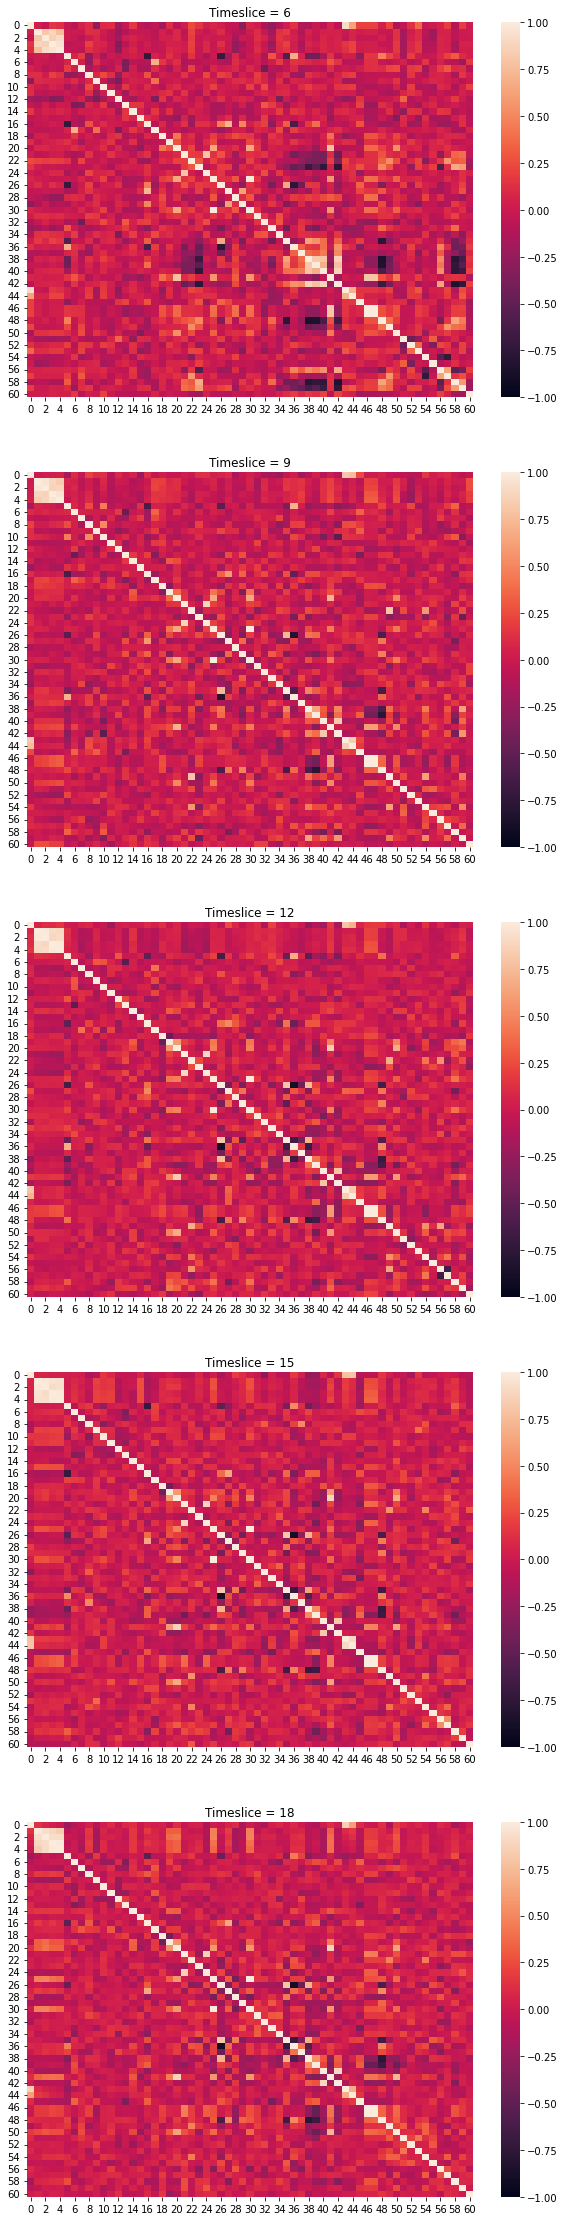

In [200]:
# Correlation Plots

summ_path = "/glade/work/abaker/mpas_data/100_ens_summary"
summ_files = [summ_path + "/mpas_sum_ts" + str(i) + ".nc" for i in [6, 9, 12, 15, 18]]

cutoff = 0.85

fig, axs = plt.subplots(len(summ_files), figsize=(10, 40))

for i, f in enumerate(summ_files):
    test_summary = xr.open_dataset(f)
    corr = np.corrcoef(test_summary.global_mean)
    sns.heatmap(corr, vmin=-1, vmax=1, ax=axs[i])
    axs[i].set_title("Timeslice = " + str(i * 3 + 6))

    correlated_entries = np.argwhere((corr > cutoff) | (corr < -cutoff))
    filt_correlated_entries = []
    for i in correlated_entries:
        if i[0] != i[1]:
            filt_correlated_entries.append(i)
    correlated_strings = []
    for i in filt_correlated_entries:
        correlated_strings.append([var_strings[i[0]], var_strings[i[1]]])
    # print(correlated_strings)

plt.show()

In [201]:
correlated_strings

[['acsnow', 'snow'],
 ['cd', 'cda'],
 ['cd', 'ck'],
 ['cda', 'cd'],
 ['cda', 'ck'],
 ['cda', 'cka'],
 ['ck', 'cd'],
 ['ck', 'cda'],
 ['ck', 'cka'],
 ['cka', 'cda'],
 ['cka', 'ck'],
 ['hfx', 'skintemp'],
 ['hpbl', 'kpbl'],
 ['kpbl', 'hpbl'],
 ['lh', 'qfx'],
 ['precipw', 'rainc'],
 ['qfx', 'lh'],
 ['rainc', 'precipw'],
 ['sh2o', 'smois'],
 ['skintemp', 'hfx'],
 ['smois', 'sh2o'],
 ['snow', 'acsnow'],
 ['t2m', 'th2m'],
 ['th2m', 't2m']]

In [199]:
summ_files

['/glade/work/abaker/mpas_data/100_ens_summary/mpas_sum_ts6.nc',
 '/glade/work/abaker/mpas_data/100_ens_summary/mpas_sum_ts9.nc',
 '/glade/work/abaker/mpas_data/100_ens_summary/mpas_sum_ts12.nc',
 '/glade/work/abaker/mpas_data/100_ens_summary/mpas_sum_ts15.nc',
 '/glade/work/abaker/mpas_data/100_ens_summary/mpas_sum_ts18.nc']

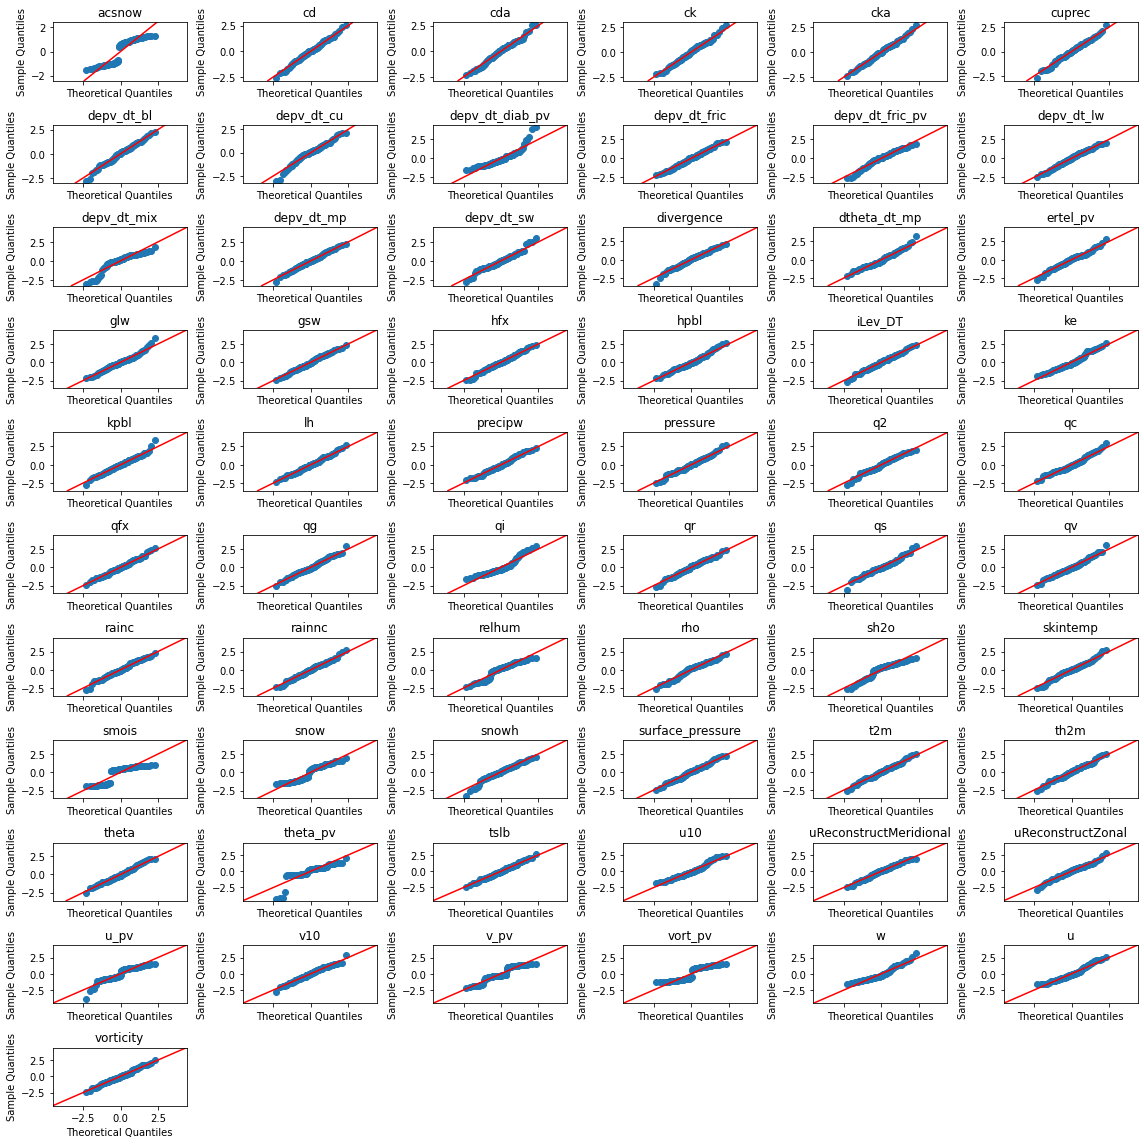

In [213]:
# QQPlots

test_summary = xr.open_dataset(summ_files[0])

fig, axs = plt.subplots(11, 6, sharex=True, figsize=(16, 16))
for i in range(len(var_strings)):
    row = i // 6
    col = i % 6
    sm.qqplot(test_summary.global_mean[i, :], ax=axs[row, col], fit=True, line="45")
    axs[row, col].set_title(var_strings[i])

for i in range(len(var_strings), 11 * 6):
    row = i // 6
    col = i % 6
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [8]:
# SHAPIRO-WILK

test_summary = xr.open_dataset(summ_files[4])

for i in range(len(var_strings)):
    shap_score, shap_p = shapiro(test_summary.global_mean[i, :])
    out = f"{var_strings[i]}, W = {shap_score:.4f}, pvalue = {shap_p:.4f}"
    if shap_p < 0.005:
        # print(out)
        print(var_strings[i])

pressure
rho
sh2o
smois
surface_pressure
t2m
th2m
theta
theta_pv
tslb


In [205]:
np.where(test_summary.vars == b'acsnow                ')

(array([0]),)

In [188]:
test_summary.vars

<xarray.DataArray 'vars' (nvars: 61)>
array([b'acsnow                ', b'cd                    ',
       b'cda                   ', b'ck                    ',
       b'cka                   ', b'cuprec                ',
       b'depv_dt_bl            ', b'depv_dt_cu            ',
       b'depv_dt_diab_pv       ', b'depv_dt_fric          ',
       b'depv_dt_fric_pv       ', b'depv_dt_lw            ',
       b'depv_dt_mix           ', b'depv_dt_mp            ',
       b'depv_dt_sw            ', b'divergence            ',
       b'dtheta_dt_mp          ', b'ertel_pv              ',
       b'glw                   ', b'gsw                   ',
       b'hfx                   ', b'hpbl                  ',
       b'iLev_DT               ', b'ke                    ',
       b'kpbl                  ', b'lh                    ',
       b'precipw               ', b'pressure              ',
       b'q2                    ', b'qc                    ',
       b'qfx                   ', b'qg                    ',
       b'qi                    ', b'qr                    ',
       b'qs                    ', b'qv                    ',
       b'rainc                 ', b'rainnc                ',
       b'relhum                ', b'rho                   ',
       b'sh2o                  ', b'skintemp              ',
       b'smois                 ', b'snow                  ',
       b'snowh                 ', b'surface_pressure      ',
       b't2m                   ', b'th2m                  ',
       b'theta                 ', b'theta_pv              ',
       b'tslb                  ', b'u10                   ',
       b'uReconstructMeridional', b'uReconstructZonal     ',
       b'u_pv                  ', b'v10                   ',
       b'v_pv                  ', b'vort_pv               ',
       b'w                     ', b'u                     ',
       b'vorticity             '], dtype='|S22')
Dimensions without coordinates: nvars

(array([ 4.,  5., 11., 15.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  5., 12., 10., 11.,  9.,  6.]),
 array([0.01423574, 0.01423616, 0.01423659, 0.01423701, 0.01423743,
        0.01423785, 0.01423827, 0.01423869, 0.01423911, 0.01423953,
        0.01423995, 0.01424037, 0.01424079, 0.01424122, 0.01424164,
        0.01424206, 0.01424248, 0.0142429 , 0.01424332, 0.01424374,
        0.01424416]),
 <BarContainer object of 20 artists>)

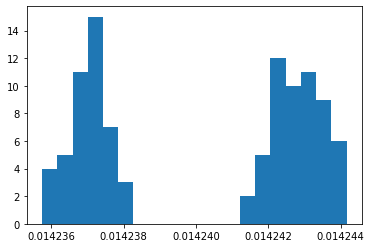

In [209]:
test_summary = xr.open_dataset(summ_files[0])
plt.hist(test_summary.global_mean[0, :], bins=20)

(array([ 3.,  0.,  2.,  7.,  7.,  7.,  5.,  7., 11.,  4.,  7.,  9.,  8.,
        10.,  5.,  3.,  3.,  0.,  1.,  1.]),
 array([0.02545025, 0.02545212, 0.02545399, 0.02545587, 0.02545774,
        0.02545961, 0.02546149, 0.02546336, 0.02546523, 0.0254671 ,
        0.02546898, 0.02547085, 0.02547272, 0.0254746 , 0.02547647,
        0.02547834, 0.02548021, 0.02548209, 0.02548396, 0.02548583,
        0.0254877 ]),
 <BarContainer object of 20 artists>)

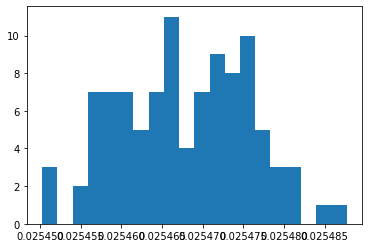

In [212]:
test_summary = xr.open_dataset(summ_files[1])
plt.hist(test_summary.global_mean[0, :], bins=20)

(array([ 2.,  3.,  4.,  5.,  8.,  5., 12.,  9., 13., 11., 12.,  6.,  2.,
         5.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([0.03323049, 0.03323413, 0.03323777, 0.03324141, 0.03324505,
        0.03324869, 0.03325233, 0.03325597, 0.03325962, 0.03326326,
        0.0332669 , 0.03327054, 0.03327418, 0.03327782, 0.03328146,
        0.0332851 , 0.03328875, 0.03329239, 0.03329603, 0.03329967,
        0.03330331]),
 <BarContainer object of 20 artists>)

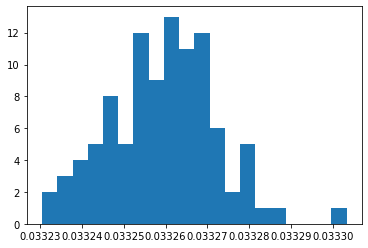

In [211]:
test_summary = xr.open_dataset(summ_files[2])
plt.hist(test_summary.global_mean[0, :], bins=20)

(array([ 2.,  4.,  3.,  2.,  9.,  7., 11.,  9., 13., 13.,  8.,  3.,  4.,
         1.,  4.,  1.,  1.,  3.,  0.,  2.]),
 array([0.04480507, 0.04481099, 0.04481692, 0.04482285, 0.04482877,
        0.0448347 , 0.04484062, 0.04484655, 0.04485248, 0.0448584 ,
        0.04486433, 0.04487025, 0.04487618, 0.04488211, 0.04488803,
        0.04489396, 0.04489988, 0.04490581, 0.04491174, 0.04491766,
        0.04492359]),
 <BarContainer object of 20 artists>)

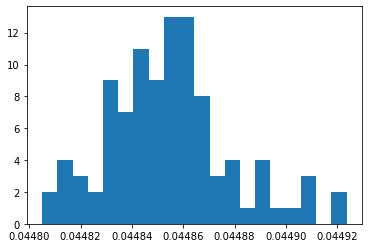

In [208]:
plt.hist(test_summary.global_mean[0, :], bins=20)

In [6]:
hist_path = "/glade/scratch/abaker/mpas_hist"
hist_files = [hist_path + "/history." + str(i).zfill(3) + ".nc" for i in range(100)]

In [13]:
def get_var_timeslice(hist, var_name, timeslice):
    sliced = hist.sel(Time=timeslice)
    sliced_var = sliced[var_name]
    if 'nVertLevels' in sliced_var.dims:
        sliced_var = sliced_var.mean('nVertLevels')
    return sliced_var

In [14]:
def get_lats_lons(hist):
    lats = hist["latCell"]
    lons = hist["lonCell"]
    return lats, lons

In [17]:
def plot_vars(data, lats, lons, title, unit, save=False, filename=None):
    plt.clf()

    cmap = sns.color_palette("flare", as_cmap=True)

    # f, ax = plt.subplots(figsize=(15, 10))

    f, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})

    ax.coastlines(alpha=0.3)

    # points = ax.scatter(x=lons, y=lats, c=data, s=7, cmap=cmap)

    #     convert from radians to degrees

    lats = lats * 180 / np.pi
    lons = lons * 180 / np.pi
    lons = ((lons - 180.0) % 360.0) - 180.0

    points = ax.scatter(x=lons, y=lats, c=data, s=7, cmap=cmap, transform=ccrs.PlateCarree())

    f.colorbar(points, label=unit)

    plt.title(title)
    plt.xlabel("Longitude (rad)")
    plt.ylabel("Latitude (rad)")

    if filename != None:
        plt.savefig(filename)
        plt.close('all')
    else:
        plt.show()
    return

In [7]:
def get_info(data, var_name, t):
    units = data[var_name].attrs["units"]
    long_name = data[var_name].attrs["long_name"]
    title = var_name + " (" + long_name + "), t=" + str(t)
    return title, units

In [77]:
def global_analysis(file_list, var_name, time_slice, opp_name, filepath=None):
    all_hist_vars = []

    data = xr.open_dataset(file_list[0])
    lats, lons = get_lats_lons(data)

    title, units = get_info(data, var_name, time_slice)

    for i in range(len(file_list)):
        data = xr.open_dataset(hist_files[i])
        all_hist_vars.append(get_var_timeslice(data, var_name, time_slice).data)

    stacked_vars = np.vstack(all_hist_vars)

    if opp_name == "mean":
        trans_var = np.mean(stacked_vars, axis=0)
        title = "Mean " + title
    elif opp_name == "ptp":
        trans_var = np.ptp(stacked_vars, axis=0)
        title = "PTP " + title
    elif opp_name == "std":
        trans_var = np.std(stacked_vars, axis=0)
        title = "STD " + title
    elif opp_name == "max":
        trans_var = np.amax(stacked_vars, axis=0)
        title = "Max " + title
    if filepath != None:
        filename = "global_" + var_name + "_" + opp_name + "_" + "t" + str(time_slice) + ".png"
        filename = filepath + "/" + filename
        plot_vars(trans_var, lats, lons, title, units, filename=filename)
    else:
        plot_vars(trans_var, lats, lons, title, units)

In [18]:
global_analysis(hist_files, "acsnow", 6, "ptp", filepath="/glade/u/home/teopb/figures")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


issue with tslb
issue with w
issue with u
issue with vorticity


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


issue with tslb
issue with w
issue with u
issue with vorticity


<Figure size 432x288 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

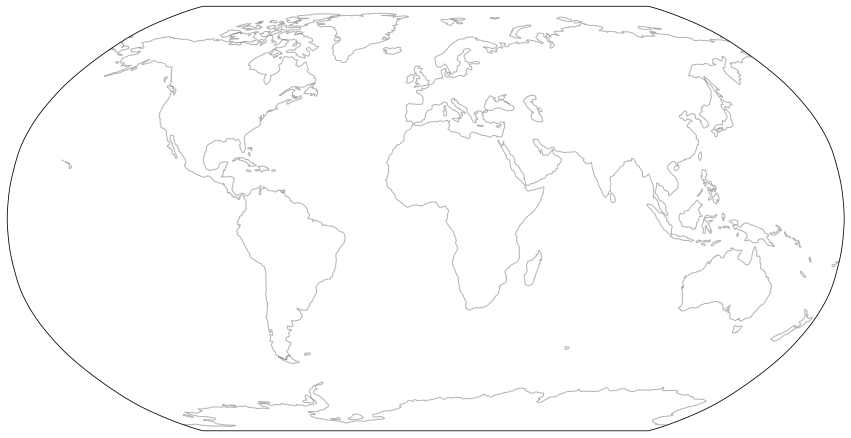

In [19]:
# Generate global variance figures for all variables
for t in [6, 18]:
    for name in var_strings:
        try:
            global_analysis(hist_files, name, t, "ptp", filepath="/glade/u/home/teopb/figures")
        except:
            print(f"issue with {name}")

<Figure size 432x288 with 0 Axes>

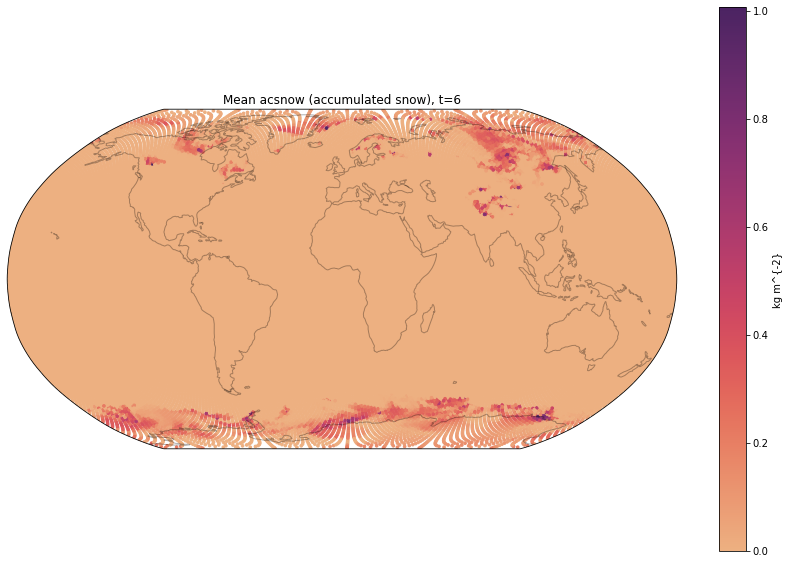

In [66]:
global_analysis(hist_files, 'acsnow', 6, "mean")

<Figure size 432x288 with 0 Axes>

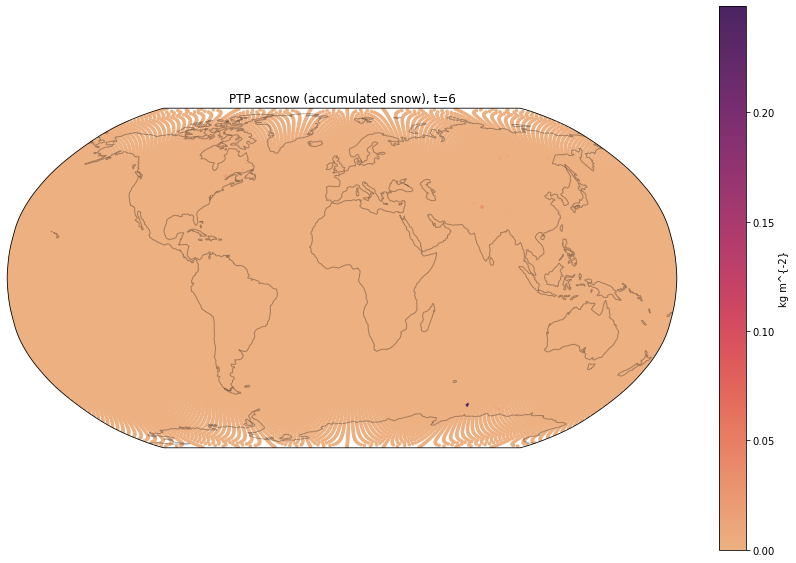

In [60]:
global_analysis(hist_files, 'acsnow', 6, "ptp")

<Figure size 432x288 with 0 Axes>

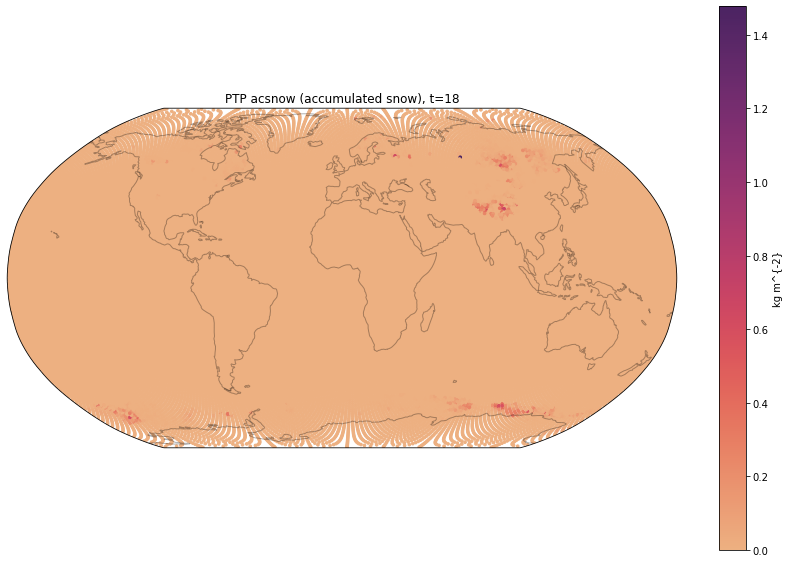

In [61]:
global_analysis(hist_files, 'acsnow', 18, "ptp")

<Figure size 432x288 with 0 Axes>

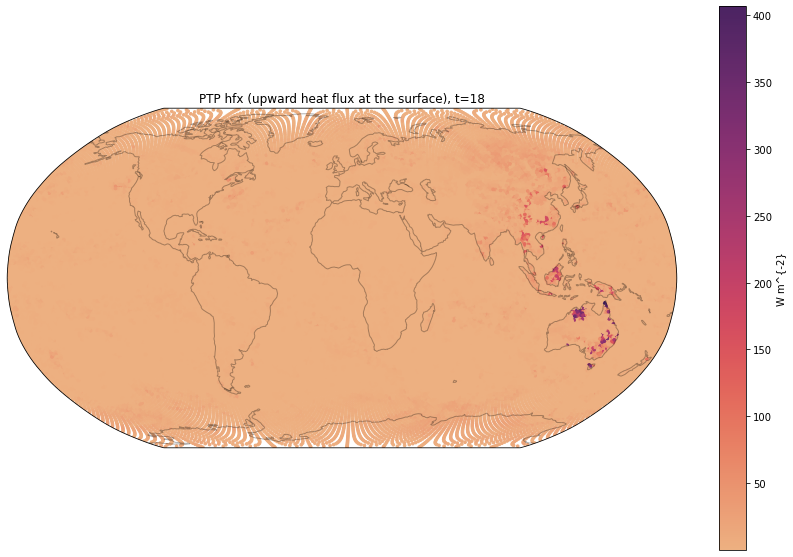

In [62]:
global_analysis(hist_files, 'hfx', 18, "ptp")

<Figure size 432x288 with 0 Axes>

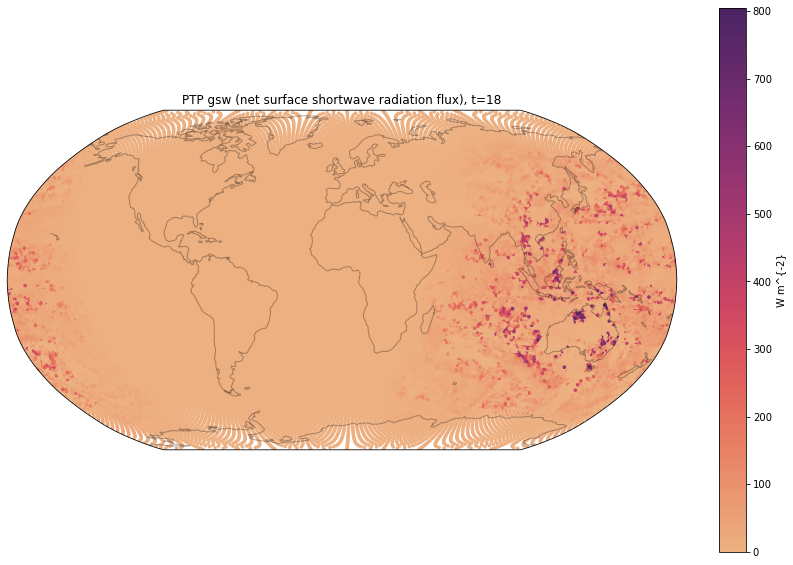

In [63]:
global_analysis(hist_files, 'gsw', 18, "ptp")

<Figure size 432x288 with 0 Axes>

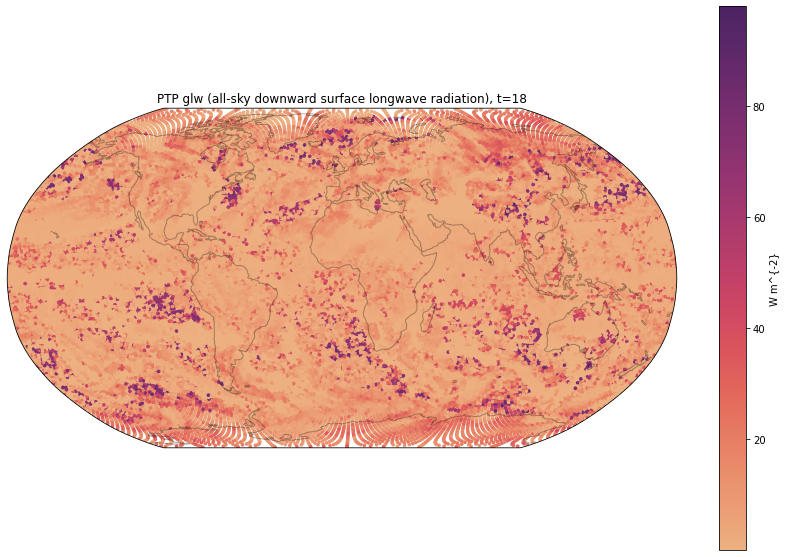

In [64]:
global_analysis(hist_files, 'glw', 18, "ptp")

In [187]:
# How many ensemble members cause large range at specific locations at early timesteps?
def ensemble_variance_cause(file_list, var_name, time_slice, opp_name, filepath=None):
    all_hist_vars = []

    data = xr.open_dataset(file_list[0])
    lats, lons = get_lats_lons(data)

    title, units = get_info(data, var_name, time_slice)

    for i in range(len(file_list)):
        data = xr.open_dataset(hist_files[i])
        all_hist_vars.append(get_var_timeslice(data, var_name, time_slice).data)

    stacked_vars = np.vstack(all_hist_vars)

    _, cell_count = stacked_vars.shape

    if opp_name == "mean":
        trans_var = np.mean(stacked_vars, axis=0)
        title = "Mean " + title
    elif opp_name == "ptp":
        trans_var = np.ptp(stacked_vars, axis=0)
        title = "PTP " + title
    elif opp_name == "std":
        trans_var = np.std(stacked_vars, axis=0)
        title = "STD " + title
    elif opp_name == "max":
        trans_var = np.amax(stacked_vars, axis=0)
        title = "Max " + title

    #     Create histogram of nonzero transformed variable cells (aka cells where peak to peak is greater than zero)
    #     Actually plot bins after first of 100 to enable viewing relevant values.
    nonzero = np.count_nonzero(trans_var)
    n, bins, patches = plt.hist(trans_var, bins=100)
    plt.clf()
    plt.hist(trans_var[trans_var > bins[1]], bins=99)
    title_str = (
        f"{title} \n Cell {opp_name} Hist > {bins[1]:.4f}, Nonzero: {(nonzero/cell_count)*100:.1f}%"
    )
    x_label = f"{opp_name} {units}"
    plt.xlabel(x_label)
    plt.title(title_str)

    if filepath != None:
        filename = f"{var_name}_{opp_name}_hist_t_{str(time_slice)}.png"
        filename = filepath + "/" + filename
        plt.savefig(filename)
        plt.clf()
    else:
        plt.show()

    #     Get cell indices in last bin
    n_last = n[-1]
    cell_idx = np.argwhere(trans_var > bins[-2])[0][0]
    plt.hist(stacked_vars[:, cell_idx], bins=100)
    title_str = f"{title} \n Hist of cell in top {opp_name} bin (1 of {int(n_last)})"
    plt.title(title_str)
    x_label = f"{units}"
    plt.xlabel(x_label)

    if filepath != None:
        filename = f"{var_name}_{opp_name}_tophist_t_{str(time_slice)}.png"
        filename = filepath + "/" + filename
        plt.savefig(filename)
        plt.clf()
    else:
        plt.show()

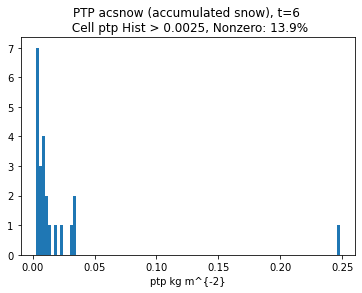

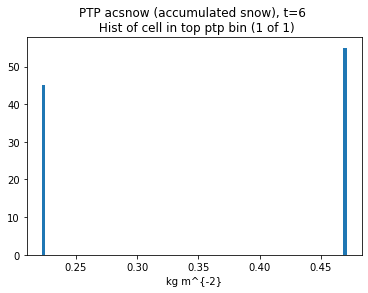

In [188]:
# ensemble_variance_cause(hist_files, "acsnow", 6, "ptp", filepath="/glade/u/home/teopb/figures")
ensemble_variance_cause(hist_files, "acsnow", 6, "ptp")

In [185]:
# Generate global variance figures for all variables
for t in [6, 18]:
    for name in var_strings:
        try:
            ensemble_variance_cause(
                hist_files, name, t, "ptp", filepath="/glade/u/home/teopb/figures"
            )
        except:
            print(f"issue with {name}")

<Figure size 432x288 with 0 Axes>

In [174]:
# Spread of ensemble global mean over time
long_summ_filepath = "/glade/work/abaker/mpas_data/100_ens_summary/"


def gm_time_spread(long_summ_filepath, hist_file, var_name=None, filepath=None):
    summ_files = [fn for fn in listdir(long_summ_filepath) if fn.endswith(".nc")]

    timesteps = np.array(sorted([int(re.findall(r'\d+', each)[0]) for each in summ_files]))

    # timestep 3 has fewer variables
    timesteps = timesteps[timesteps > 3]

    test_summ = xr.open_dataset(long_summ_filepath + summ_files[0])
    var_names = np.char.rstrip(np.char.decode(test_summ.varCell))

    ens_size = test_summ.dims['ens_size']
    var_size = test_summ.dims['nvarsCell']
    time_size = len(timesteps)

    temp_array = np.empty((time_size, var_size, ens_size))

    hist_data = xr.open_dataset(hist_file)

    for t, step in enumerate(timesteps):
        file_name = long_summ_filepath + f"mpas_sum_ts{step}.nc"
        # print(file_name)
        data = xr.open_dataset(file_name)
        # print(data.global_mean.shape)
        for v in range(len(var_names)):
            temp_array[t, v, :] = data.global_mean[v, :]

    means = np.mean(temp_array, axis=2)

    #     Plot 1 variable and display
    if var_name != None:
        title, units = get_info(hist_data, var_name, timesteps[0])
        var_idx = np.where(var_names == var_name)[0][0]
        plt.clf()
        for i in range(ens_size):
            diff = temp_array[:, var_idx, i] - means[:, var_idx]
            plt.plot(timesteps, diff, alpha=0.5)

        title_str = f"{title} Ensemble Spread From Mean"
        x_label = "Timestep"
        plt.xlabel(x_label)
        plt.title(title_str)
        plt.show()

    #     Plot all variables and save at filepath
    if filepath != None:
        for var_idx, var_name in enumerate(var_names):
            try:
                title, units = get_info(hist_data, var_name, timesteps[0])
                for i in range(ens_size):
                    diff = temp_array[:, var_idx, i] - means[:, var_idx]
                    plt.plot(timesteps, diff, alpha=0.5)

                title_str = f"{title} Ensemble Spread From Mean"
                x_label = "Timestep"
                plt.xlabel(x_label)
                plt.title(title_str)

                filename = f"{var_name}_gm_spread.png"
                filename = filepath + filename
                plt.savefig(filename)
                plt.clf()
            except:
                print(f"issue with {var_name}")

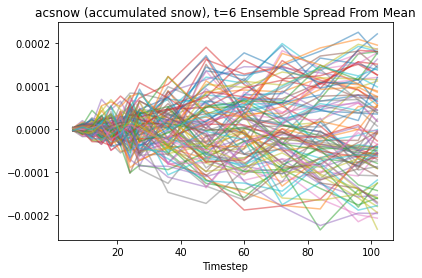

In [170]:
# single var spread
gm_time_spread(long_summ_filepath, hist_files[0], var_name="acsnow")

In [175]:
# save figures of all variables
gm_time_spread(long_summ_filepath, hist_files[0], filepath="/glade/u/home/teopb/figures/")

<Figure size 432x288 with 0 Axes>